In [1]:
## Business case:-On the basis of given parameters(features) our
#target is to find
## whether a patient will have B type or M type cancer.
## So we are solving a classifcation task.

In [3]:
## importing the libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
data = pd.read_csv('breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [10]:
data.describe(include='O')

,diagnosis
count,569
unique,2
top,B
freq,357


## Exploratory Data Analysis

In [19]:
# plt.figure(figsize=(18,23), facecolor='White')
# plotnumber = 1
# for column in data:
#   if plotnumber <= 30:
#     a = plt.subplot(3,3, plotnumber)
#     sns.histplot(data[column])
#     x = plt.xlabel(column, fontsize = 20)
#     y = plt.ylabel('Count', fontsize = 20)
#   plotnumber+=1
# plt.tight_layout()
# plt.show()

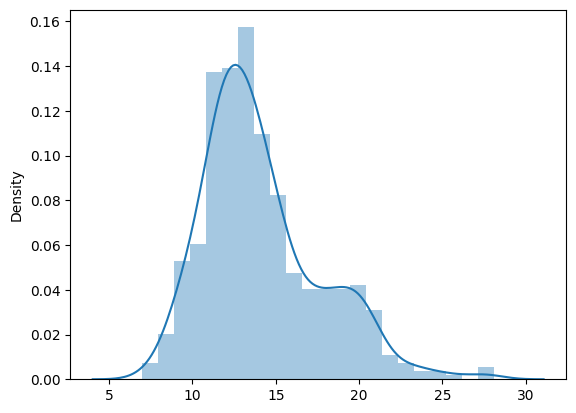

In [21]:
# Univariate Analysis
sns.distplot(x = data['radius_mean'], kde = True)
plt.show()

In [22]:
## creating independent and dependent variables
X = data.iloc[:,2:-1]
y = data.diagnosis

In [23]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [25]:
##creating training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [27]:
X_test_scaled

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [28]:
X_test_scaled

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [29]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (10,3),
                      learning_rate_init = 0.1,
                      max_iter = 100,
                      random_state = 2)
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
y_train_predict = model.predict(X_train_scaled)

In [30]:
y_predict

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M'], dtype='<U1')

In [33]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
print("Train Accuracy: ", accuracy_score(y_train, y_train_predict))
print("Test Accuracy: ", accuracy_score(y_test, y_predict))

Train Accuracy:  0.9824175824175824
Test Accuracy:  0.9385964912280702


In [37]:
print("Precission: ", precision_score(y_test, y_predict, average='macro'))
print("Recall: ", recall_score(y_test, y_predict, average = 'macro'))
print("F1 Score: ", f1_score(y_test, y_predict, average = 'macro'))

Precission:  0.9299242424242424
Recall:  0.9461185718964953
F1 Score:  0.9359910162829871
